# Test functions for ERA5 in cream package 

This notebook demonstrates how **cream** can be used to download, process and plot climate reanalysis data from ERA5. 

*Created by Julia Kukulies: julia.kukulies@gu.se* 




In [3]:
from cream import dataproducts

## Download different ERA5 data products

### Example 1: Global data of convective rain at monthly resolution, saved per year 

In [4]:
# create an ERA5 data product object which contains all necessary information
global_rain = dataproducts.ERA5('single-levels', 'crr', 'monthly')

# attributes 
print(global_rain.product, global_rain.variables, global_rain.resolution, global_rain.path)

single-levels crr monthly cache


In [11]:
# the class ERA5 contains different download methods, one example is the download per year: 
help(dataproducts.ERA5.get_data_per_year) 

Help on function get_data_per_year in module cream.dataproducts:

get_data_per_year(self, years, months=None, days=None, hours=None)
    Downloads ERA5 data for a specific year or multiple years at hourly or monthly resolution. The output data is stored seperately for each year.
    
    Parameter:
    ----------
    
    years(list): string list with year(s) to download at hourly or monthly resolution
    
    optional:
    ----------
    
    months(list): string list with months, if None: all months are downloaded
    days(list): string list with days, if None: all days are downloaded
    hours(list): string list with hours, if None: all hours are downloaded for hourly data and monthly means



In [5]:
# download all months for 2018 and 2019 and save output per year 
global_rain.get_data_per_year(('2018', '2019'))

2020-03-31 14:54:16,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-03-31 14:54:17,179 INFO Request is completed
2020-03-31 14:54:17,182 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data5/adaptor.mars.internal-1585636666.1157537-23873-9-3db4a183-799e-4b86-ad33-dd5a7a51f94d.nc to cache/era5_single-levels-monthly-means_2018_crr.nc (23.8M)
2020-03-31 14:54:21,216 INFO Download rate 5.9M/s   
2020-03-31 14:54:21,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means


file downloaded and saved as  cache/era5_single-levels-monthly-means_2018_crr.nc


2020-03-31 14:54:22,213 INFO Downloading http://136.156.133.41/cache-compute-0013/cache/data7/adaptor.mars.internal-1585636675.3028681-16433-35-29e56e85-63d8-4d2b-9d60-b970fe506173.nc to cache/era5_single-levels-monthly-means_2019_crr.nc (23.8M)
2020-03-31 14:54:25,998 INFO Download rate 6.3M/s   


file downloaded and saved as  cache/era5_single-levels-monthly-means_2019_crr.nc


**Note that the download is omitted, if the data already exists in cache/ directory **

If we would now for example call the download method again, we do not download the data again, to avoid unneccessary accumulation of data and allow to continue the download where it stopped, when interrupted. 

In [6]:
global_rain.get_data_per_year(('2018', '2019'))

omittted download for  era5_single-levels-monthly-means_2018_crr.nc
omittted download for  era5_single-levels-monthly-means_2019_crr.nc


### Example 2: Dewpoint temperature at surface at hourly resolution for a specific region, e.g. Europe

In [8]:
help(dataproducts.ERA5.get_data_for_range)

Help on function get_data_for_range in module cream.dataproducts:

get_data_for_range(self, start, end)
    Download ERA5 for a given range.
    
    Parameter:
    ----------
    
    start(datetime.datetime): start time
    end(datetime.datetime): end time



In [2]:
hourly_temps = dataproducts.ERA5('single-levels', '2m_dewpoint_temperature', 'hourly', domain = "70/-10/35/40" )

import datetime 
start = datetime.datetime(2016,7,30, 10)
end = datetime.datetime(2016,7,30, 20)

hourly_temps.get_data_for_range(start, end)

2020-03-31 11:11:33,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2020-03-31 11:11:34,553 INFO Request is completed
2020-03-31 11:11:34,556 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data6/adaptor.mars.internal-1585645432.798762-30852-9-19fd1d81-a6c3-452a-918e-34e89b06cae7.nc to cache/era5_single-levels_201673010_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:34,746 INFO Download rate 308.8K/s
2020-03-31 11:11:34,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673010_2m_dewpoint_temperature.nc


2020-03-31 11:11:35,328 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data7/adaptor.mars.internal-1585645436.41168-30593-13-dfb92eae-8667-411b-b3b5-13ea3c21b850.nc to cache/era5_single-levels_201673011_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:35,530 INFO Download rate 287.6K/s
2020-03-31 11:11:35,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673011_2m_dewpoint_temperature.nc


2020-03-31 11:11:36,198 INFO Downloading http://136.156.133.25/cache-compute-0008/cache/data4/adaptor.mars.internal-1585645439.301399-23419-11-d53a7e42-823d-4061-a303-cc8811624dda.nc to cache/era5_single-levels_201673012_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:36,411 INFO Download rate 272.9K/s
2020-03-31 11:11:36,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673012_2m_dewpoint_temperature.nc


2020-03-31 11:11:37,139 INFO Downloading http://136.156.133.42/cache-compute-0014/cache/data6/adaptor.mars.internal-1585645466.8556588-27323-12-d9b83b24-70e4-464c-8e7c-e70ca0b3c284.nc to cache/era5_single-levels_201673013_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:37,338 INFO Download rate 293.2K/s
2020-03-31 11:11:37,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673013_2m_dewpoint_temperature.nc


2020-03-31 11:11:38,124 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data0/adaptor.mars.internal-1585645718.8132913-17651-1-ef436e2c-c48c-49fb-ac10-c9f6fcd87f0c.nc to cache/era5_single-levels_201673014_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:38,460 INFO Download rate 173K/s
2020-03-31 11:11:38,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673014_2m_dewpoint_temperature.nc


2020-03-31 11:11:39,195 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data1/adaptor.mars.internal-1585645722.0549786-5532-3-70046b23-1e26-4091-88a9-ecd34de8521e.nc to cache/era5_single-levels_201673015_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:39,370 INFO Download rate 335.3K/s
2020-03-31 11:11:40,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673015_2m_dewpoint_temperature.nc


2020-03-31 11:11:40,963 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data1/adaptor.mars.internal-1585645744.453849-5596-3-77ac5fe8-74c8-4203-84d8-8f6f600662d8.nc to cache/era5_single-levels_201673016_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:41,113 INFO Download rate 391.4K/s
2020-03-31 11:11:41,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673016_2m_dewpoint_temperature.nc


2020-03-31 11:11:41,979 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data3/adaptor.mars.internal-1585645747.3061981-3130-5-dc8f7d9b-85bd-46a4-b741-1b9329042f15.nc to cache/era5_single-levels_201673017_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:42,133 INFO Download rate 382.5K/s
2020-03-31 11:11:42,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673017_2m_dewpoint_temperature.nc


2020-03-31 11:11:43,920 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data9/adaptor.mars.internal-1585645750.095165-3225-3-a9998fec-62b6-4257-9db8-2e63064791db.nc to cache/era5_single-levels_201673018_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:44,073 INFO Download rate 384.2K/s
2020-03-31 11:11:44,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673018_2m_dewpoint_temperature.nc


2020-03-31 11:11:45,477 INFO Downloading http://136.156.133.25/cache-compute-0008/cache/data9/adaptor.mars.internal-1585645751.8056555-26104-3-651e0c4a-b801-4b49-99b0-0faf3d691cf1.nc to cache/era5_single-levels_201673019_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:45,642 INFO Download rate 356.9K/s
2020-03-31 11:11:46,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


file downloaded and saved as cache/era5_single-levels_201673019_2m_dewpoint_temperature.nc


2020-03-31 11:11:47,247 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data3/adaptor.mars.internal-1585645754.4193025-30593-24-7f9d934f-232a-43b2-8065-bb39e9bc8612.nc to cache/era5_single-levels_201673020_2m_dewpoint_temperature.nc (57.7K)
2020-03-31 11:11:47,397 INFO Download rate 391K/s


file downloaded and saved as cache/era5_single-levels_201673020_2m_dewpoint_temperature.nc


## Example 3: Download specific timesteps to create composites 

A common method in meteorology are composite analyses. This means that you put together timeslots of a certain variable (e.g. precipitation or wind circulation), which you associate with a weather or climate phenomenon. BY taking the average over timesteps with specific properties, you can get an idea about how these variables are connected. One example for this is that you have a lot of storm tracks and you want to get an idea, how the large-scale wind circulation looks like before the storms start. This means you want to look only at specific timesteps: here, just before storm initiation. 

In [12]:
help(dataproducts.ERA5.get_data_for_composites)

Help on function get_data_for_composites in module cream.dataproducts:

get_data_for_composites(self, composites)
    Downloads ERA5 data for hourly (non-consecutive) timesteps, where each timestep is saved as a separate file. Since the timesteps do not need to be consecutive, the function enables the download for climate composites.
    
    Parameter:
    ----------
    
    composites(dict): dictionary with years, months, days and hours in datetime format for timesteps



In [2]:
# example list of timesteps for composite 

composites= [datetime.datetime(2014,3,2,1), datetime.datetime(2015,6,2,9), datetime.datetime(2015,3,2,10), datetime.datetime(2015,4,3,10)  ]

In [2]:
wind_europe = dataproducts.ERA5('pressure-levels',['u_component_of_wind','v_component_of_wind', 'geopotential'], 'hourly',"70/-10/35/40" ) 

In [6]:
wind_europe.get_data_for_composites(composites)


2020-03-31 15:17:42,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-03-31 15:17:43,204 INFO Request is queued
2020-03-31 15:17:45,801 INFO Request is running
2020-03-31 15:17:48,100 INFO Request is completed
2020-03-31 15:17:48,102 INFO Downloading http://136.156.133.25/cache-compute-0008/cache/data0/adaptor.mars.internal-1585660664.9280703-875-3-0616dc71-df3b-4b9e-a54d-c5282595761d.nc to cache/era5_pressure-levels_2014321_u_component_of_windv_component_of_windgeopotential.nc (999.5K)
2020-03-31 15:17:48,533 INFO Download rate 2.3M/s  
2020-03-31 15:17:48,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


file downloaded and saved as cache/era5_pressure-levels_2014321_u_component_of_windv_component_of_windgeopotential.nc


2020-03-31 15:17:49,286 INFO Request is queued
2020-03-31 15:17:50,338 INFO Request is running
2020-03-31 15:17:54,184 INFO Request is completed
2020-03-31 15:17:54,187 INFO Downloading http://136.156.133.32/cache-compute-0009/cache/data3/adaptor.mars.internal-1585660669.6097844-3290-3-f77ba3f9-abd3-483f-95b8-32d5a572d36f.nc to cache/era5_pressure-levels_2015629_u_component_of_windv_component_of_windgeopotential.nc (999.5K)
2020-03-31 15:17:54,589 INFO Download rate 2.4M/s  
2020-03-31 15:17:55,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


file downloaded and saved as cache/era5_pressure-levels_2015629_u_component_of_windv_component_of_windgeopotential.nc


2020-03-31 15:17:55,328 INFO Request is queued
2020-03-31 15:18:00,218 INFO Request is running
2020-03-31 15:18:03,644 INFO Request is completed
2020-03-31 15:18:03,646 INFO Downloading http://136.156.133.37/cache-compute-0011/cache/data7/adaptor.mars.internal-1585660678.439736-15170-8-a96d768c-c352-4881-a53b-679b4282c2d3.nc to cache/era5_pressure-levels_20153210_u_component_of_windv_component_of_windgeopotential.nc (999.5K)
2020-03-31 15:18:04,014 INFO Download rate 2.7M/s  
2020-03-31 15:18:04,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


file downloaded and saved as cache/era5_pressure-levels_20153210_u_component_of_windv_component_of_windgeopotential.nc


2020-03-31 15:18:04,444 INFO Request is queued
2020-03-31 15:18:05,490 INFO Request is running
2020-03-31 15:18:09,333 INFO Request is completed
2020-03-31 15:18:09,334 INFO Downloading http://136.156.133.32/cache-compute-0009/cache/data3/adaptor.mars.internal-1585660685.2022479-4007-3-39bdd598-90b4-4cef-89cd-0e90574d8167.nc to cache/era5_pressure-levels_20154310_u_component_of_windv_component_of_windgeopotential.nc (999.5K)
2020-03-31 15:18:09,755 INFO Download rate 2.3M/s  


file downloaded and saved as cache/era5_pressure-levels_20154310_u_component_of_windv_component_of_windgeopotential.nc


## Plotting data 

In [1]:
from cream.dataproducts import Pressure,Surface 

In [8]:
fname = 'era5_pressure-levels_20154310_u_component_of_windv_component_of_windgeopotential.nc'
pressure_data = Pressure(fname, wind_europe.variables, wind_europe.domain)
pressure_data.time

numpy.datetime64('2015-04-03T10:00:00.000000000')

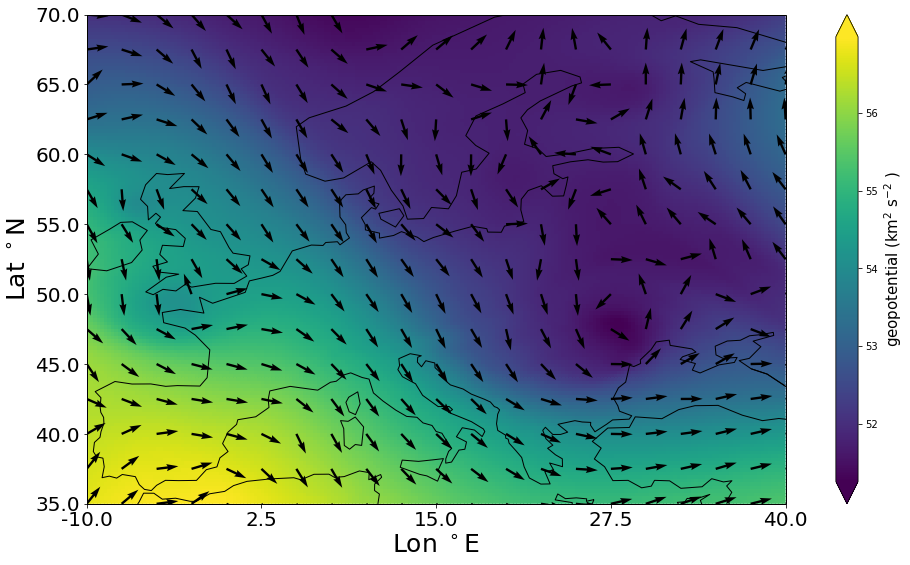

In [6]:
pressure_data.create_synoptic_plot(pl = 500 )